![Logo 1](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech1.jpg)
<div class="alert alert-block alert-info">
<h1> Ekstrakcja informacji </h1>
<h2> 7. <i>Regresja liniowa</i>  [ćwiczenia]</h2> 
<h3> Jakub Pokrywka (2021)</h3>
</div>

![Logo 2](https://git.wmi.amu.edu.pl/AITech/Szablon/raw/branch/master/Logotyp_AITech2.jpg)

# Regresja liniowa

## import bibliotek

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = [10, 5]

## Zbiór 

https://git.wmi.amu.edu.pl/kubapok/mieszkania2-below1m-public

## ładowanie zbioru train

In [2]:
DATA_DIR = Path('/home/kuba/Syncthing/przedmioty/2020-02/ISI/zajecia7_regresja_liniowa/mieszkania2')

In [3]:
with open(DATA_DIR / 'names') as f_names:
    names = f_names.read().rstrip('\n').split('\t')

In [4]:
mieszkania_train = pd.read_csv(DATA_DIR/'train/in.tsv', sep ='\t', names=names)

In [5]:
mieszkania_train.head()

isNew  rooms  floor location  sqrMetres
0  False      3      1  Centrum         78
1  False      3      2   Sołacz         62
2  False      3      0   Sołacz         15
3  False      4      0   Sołacz         14
4  False      3      0   Sołacz         15

In [6]:
with open(DATA_DIR/'train'/'expected.tsv','r') as train_exp_f:
    Y_train = np.array([float(x.rstrip('\n')) for x in train_exp_f.readlines()])

In [7]:
Y_train

array([476118., 459531., 411557., ..., 320000., 364000., 209000.])

In [8]:
mieszkania_train['price'] = Y_train

In [9]:
X_train = mieszkania_train['sqrMetres'].to_numpy()

## Wizualizacja danych

In [10]:
mieszkania_train

isNew  rooms  floor  location  sqrMetres     price
0     False      3      1   Centrum         78  476118.0
1     False      3      2    Sołacz         62  459531.0
2     False      3      0    Sołacz         15  411557.0
3     False      4      0    Sołacz         14  496416.0
4     False      3      0    Sołacz         15  406032.0
...     ...    ...    ...       ...        ...       ...
1652   True      2      0  Grunwald         51  299000.0
1653   True      2      2   Centrum         53  339000.0
1654   True      3      4     Stare         65  320000.0
1655   True      3      1      Nowe         67  364000.0
1656   True      3      3  Grunwald         50  209000.0

[1657 rows x 6 columns]

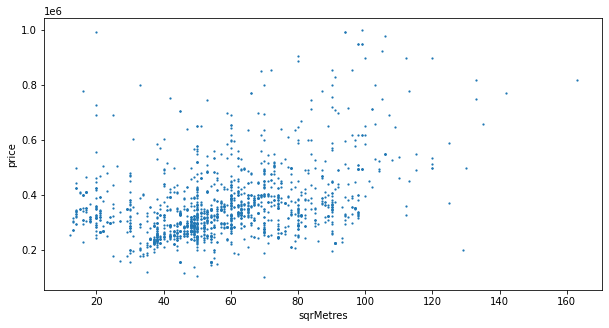

In [11]:
sns.scatterplot(x='sqrMetres',y='price', data = mieszkania_train, linewidth = 0, s = 5)

### Pytanie- Jaki jest baseline naszego systemu?

## Czym jest regresja liniowa?- przypadek jednowymiarowy

![a](obrazki/1.png)

![a](obrazki/2.png)

![a](obrazki/3.png)

![a](obrazki/4.png)

## wzór na regresję w przypadku jednowymiarowym?



$Y = a*X_1 + b$

$Y = w_1 * X_1 + w_0$

##  Zadanie - napisać funkcję predict_score(sqr_metres) która zwraca cenę mieszkania  zgodnie z modelem regresji liniowej ( 5 minut) 

Należy samemu wymyślić współczynniki modelu

In [12]:
def predict_price(sqr_metres):
    return 2000* sqr_metres + 200000

In [13]:
predict_price(20)

240000

In [14]:
predict_price(40)

280000

In [15]:
predict_price(55)

310000

In [16]:
predict_price(0)

200000

In [17]:
Y_train_predicted = predict_price(X_train)

## Mierzenie błędu

![a](obrazki/6.png)

![a](obrazki/5.png)

## Zadanie - napisać funkcję, która liczy błąd średniowadratowy na całym zbiorze (7 minut)

rmse(Y_true, Y_predicted)

In [18]:
def rmse(Y_true, Y_predicted):
    return np.sqrt(np.sum((Y_true - Y_predicted)**2)/ len(Y_true)) 

In [19]:
rmse(np.array([300_000, 250_000]), np.array([300_000, 250_000]))

0.0

In [20]:
rmse(np.array([305_000, 250_000]) ,np.array([300_000, 350_000]) )

70799.01129253148

In [21]:
rmse(np.array([300_000, 250_000]), np.array([330_000, 360_000]))

80622.57748298549

## Zadanie - za pomocą rmse policzyć błąd dla baseline (3 minuty)


In [22]:
np.ones_like(Y_train) * Y_train.mean()

array([357461.18628244, 357461.18628244, 357461.18628244, ...,
       357461.18628244, 357461.18628244, 357461.18628244])

In [23]:
rmse(Y_train, np.ones_like(Y_train) * Y_train.mean())

125698.71268014389

## Zadanie - za pomocą rmse policzyc błąd dla predykcji (2 minuty)

In [24]:
rmse(Y_train, Y_train_predicted)

123420.02227684396

## Na jakim zbiorze najlepiej sprawdzać wyniki?


![a](obrazki/7.png)

![a](obrazki/8.png)



In [25]:
mieszkania_dev = pd.read_csv(DATA_DIR/'dev-0'/'in.tsv', sep = '\t', names = names)

In [26]:
with open(DATA_DIR/'dev-0'/'expected.tsv','r') as dev_exp_f:
    Y_dev = np.array([float(x.rstrip('\n')) for x in dev_exp_f.readlines()])

In [27]:
mieszkania_dev['price'] = Y_dev

In [28]:
X_dev = mieszkania_dev['sqrMetres'].to_numpy()

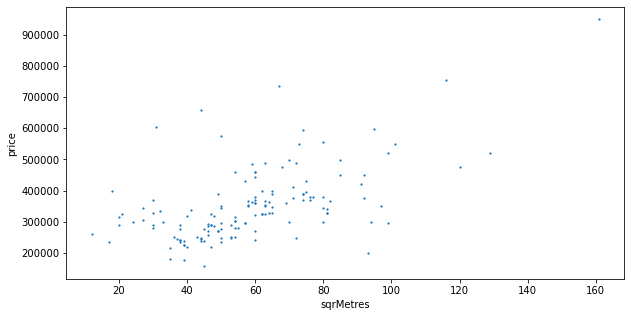

In [29]:
sns.scatterplot(x='sqrMetres',y='price', data = mieszkania_dev, linewidth = 0, s = 5)

# Zadanie - policzyć rmse dla predykcji ze zbioru deweloperskiego modelu baseline i naszego modelu regresji liniowej

In [30]:
Y_dev_predicted = predict_price(X_dev)

In [34]:
rmse(Y_dev, np.ones_like(Y_dev) * Y_dev.mean())

117309.3154367544

In [35]:
rmse(Y_dev, Y_dev_predicted)

104227.56492755697

## Przypadek wielowymiarowy

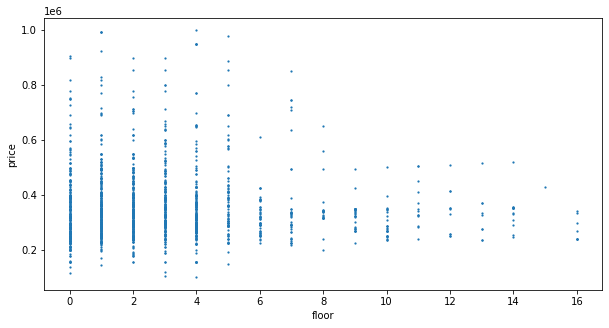

In [36]:
sns.scatterplot(x='floor',y='price', data = mieszkania_train, linewidth = 0, s = 5)

$Y = w_1 * X_1 + w_2 * X_1 + w_3 * X_3 + w_0$

## Zadanie. Napisać analogiczną funkcję  predict_price(sqr_metres, floor), policzyć rmse dla takiego modelu ( 7 minut)

In [37]:
def predict_price(sqr_metres, floor):
    return 4000* sqr_metres + (-1000)* floor + 100000

In [38]:
predict_price(50, 2)

298000

In [39]:
predict_price(50, 5)

295000

In [40]:
Y_dev_predicted = predict_price(mieszkania_dev['sqrMetres'], mieszkania_dev['floor'])

In [1]:
rmse(Y_dev, np.mean(Y_train))

NameError: name 'rmse' is not defined

In [42]:
rmse(Y_dev, Y_dev_predicted)

100227.89896326358

## jak dobrać najlepsze parametry?

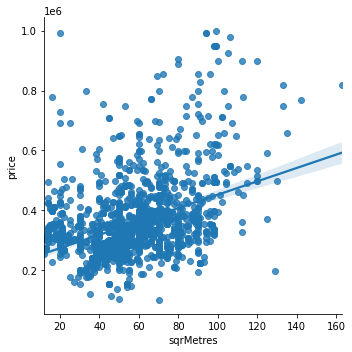

In [43]:
sns.lmplot(x='sqrMetres',y='price', data = mieszkania_train)

## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [56]:
lm_model = LinearRegression()

In [57]:
lm_model.fit(mieszkania_train[['isNew','rooms', 'floor', 'sqrMetres']], Y_train)

LinearRegression()

In [58]:
Y_train_predicted = lm_model.predict(mieszkania_train[['isNew','rooms', 'floor', 'sqrMetres']])

In [59]:
rmse(Y_train, Y_train_predicted)

103308.92502763818

In [60]:
Y_dev_predicted = lm_model.predict(mieszkania_dev[['isNew','rooms', 'floor', 'sqrMetres']])

In [61]:
rmse(Y_dev, Y_dev_predicted)

84157.8788905739

In [62]:
lm_model.predict(np.array(([[0, 4, 3, 70]])))

array([469449.27836213])

In [63]:
lm_model.predict(np.array(([[0, 4, 3, 60]])))

array([455982.54297977])

In [64]:
lm_model.coef_

array([ 4522.65059749, 73763.4125433 ,   -78.83243119,  1346.67353824])

In [65]:
lm_model.intercept_

80364.97780599032

In [66]:
0 * 4522.65059749 + 4* 73763.4125433 + 3 * (-78.83243119) + 60 * 1346.67353824 + 80364.97780599032

455982.5429800203

In [67]:
with open(DATA_DIR/'dev-0'/'out.tsv','w') as f_out_file:
    for line in Y_dev_predicted:
        f_out_file.write(str(line))
        f_out_file.write('\n')

## Uwaga - regresja linowa działa dobrze tylko dla danych, gdzie występuje korelacja liniowa

![a](obrazki/9.png)

![a](obrazki/10.png)

## Zadanie domowe
Zadanie domowe, proszę wybrać jedno z dwóch:


- sforkować repozytorium <https://git.wmi.amu.edu.pl/kubapok/auta-public>
- Opis zadadania znajduje się w README.md
- stworzyć model regresji liniowej dla tego zbioru (można użyć gotowych bibliotek)
- dodać skrypty z rozwiązaniem oraz predykcje dla dev-0 i test-A i sprawdzić czy ewaluacja jest poprawna za pomocą geval
- wynik zaliczający to max 50_000 RMSE dla dev-0
- termin 18.05, 50 punktów,Zadanie proszę oddać w MS TEAMS umieszczając link do repo (repo powinno mieć uprawnienia do odczytu dla użytkownika kubapok lub być publiczne).
- punkty: 40, dla 3 najlepszych wyników na test-A: 70

LUB:

analogicznie dla <https://git.wmi.amu.edu.pl/kubapok/retroc2>
- należy użyć wektoryzacji (np tf-dif)
- wynik zaliczający to max 50 RMSE dla dev-0  
- punkty: 60, dla 3 najlepszych wyników na test-A: 80,